In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *

In [2]:
df = pd.read_csv(r"C:\Users\brian\Desktop\Python\Mayo Model\Data_outcome_deidentified.csv", low_memory=False)
df.drop(['POST','PRE','causeofdeath','primcauseofdeath','death.info','numdisvessels','maxlesionlength', 'wposttimi', 'numbms','numdes', 'numstents', 'maxdevdiameter', 'maxdevlength','otherventsupport\nYes:1 \nNo:0'],axis=1,inplace=True)
effect = ['Inhospital mortality\nYes:1\nNo:0','Mortality 6 months\nYes:1\nNo:0', 'Mortality 1 yr\nYes:1\nNo:0','Mortality 2 yr\nYes:1\nNo:0', 'Mortality 5yr\nYes:1\nNo:0','Time from PCI to Stroke_6mo', 'Time from PCI to Stroke_1yr','Time from PCI to Stroke_2yr', 'Time from PCI to Stroke_5yr']

test_cutoffs = pd.read_csv(r"C:\Users\brian\Desktop\Python\Mayo Model\test_cutoffs.csv", header=0)
test_cutoffs = test_cutoffs.drop(['Unnamed: 0'], axis=1)
train_cutoffs = pd.read_csv(r"C:\Users\brian\Desktop\Python\Mayo Model\train_cutoffs.csv", header=0)
train_cutoffs = train_cutoffs.drop(['Unnamed: 0'], axis=1)

In [3]:
C = df.drop(effect,axis=1)
train_cause = C.iloc[:len(C)//2,:]
test_cause = C.iloc[len(C)//2:,:]

train_effect = train_cutoffs
test_effect = test_cutoffs.shift(periods=0, axis=0)

In [4]:
consequent = train_effect
anticedent = test_cause

In [5]:
prior = []
for i in consequent:
    count = 0
    sum = 0
    for j in consequent[i]:
        if j > -1 :
            sum += j
            count += 1
    prior.append(sum/count)
    #print(sum/count)

In [6]:
column_index = 0
prima_facie = []
for e in consequent:
    prima_facie.append([])
    for c in anticedent:
        effect = consequent[e]
        effect = effect[effect>-1]
        cause = anticedent[c]
        cause = cause[cause>-1]
        if (effect*cause).sum()/cause.sum() > prior[column_index]:
            prima_facie[column_index].append(c)
    column_index += 1
print("done")

done


In [10]:
column_index = 0
result = []
result_name = []
for e in consequent:
    result.append([])
    result_name.append([])
    for c1 in prima_facie[column_index]:
        prob = 0
        count = 0
        for c2 in prima_facie[column_index]:
            effect = consequent[e]
            effect = effect[effect>-1]
            cause1 = anticedent[c1]
            cause1 = cause1[cause1>-1]
            cause2 = anticedent[c2]
            cause2 = cause2[cause2>-1]
            if (cause1*cause2).sum() > 0 and ((1-cause1)*cause2).sum() > 0:
                prob_c1_and_c2 = (effect*cause1*cause2).sum()/(cause1*cause2).sum()
                prob_notc1_and_c2 = (effect*(1-cause1)*cause2).sum()/((1-cause1)*cause2).sum()
                prob += prob_c1_and_c2 - prob_notc1_and_c2
                count += 1
        if count != 0:
            result[column_index].append(prob/count)
        else:
            result[column_index].append(0)
        result_name[column_index].append(c1)
        print(result[column_index][len(result[column_index])-1])
    column_index += 1
print("done")

done


In [11]:
result_name_train = result_name

In [87]:
for i in range(9):
    for j in range(len(result[i])):
        result_name[i][j] = result_name[i][j].replace('\n','')
        if result[i][j] < 0:
            result[i][j] *= -1

In [88]:
for i in range(len(result[0])):
    print(result_name[0][i], result[0][i])

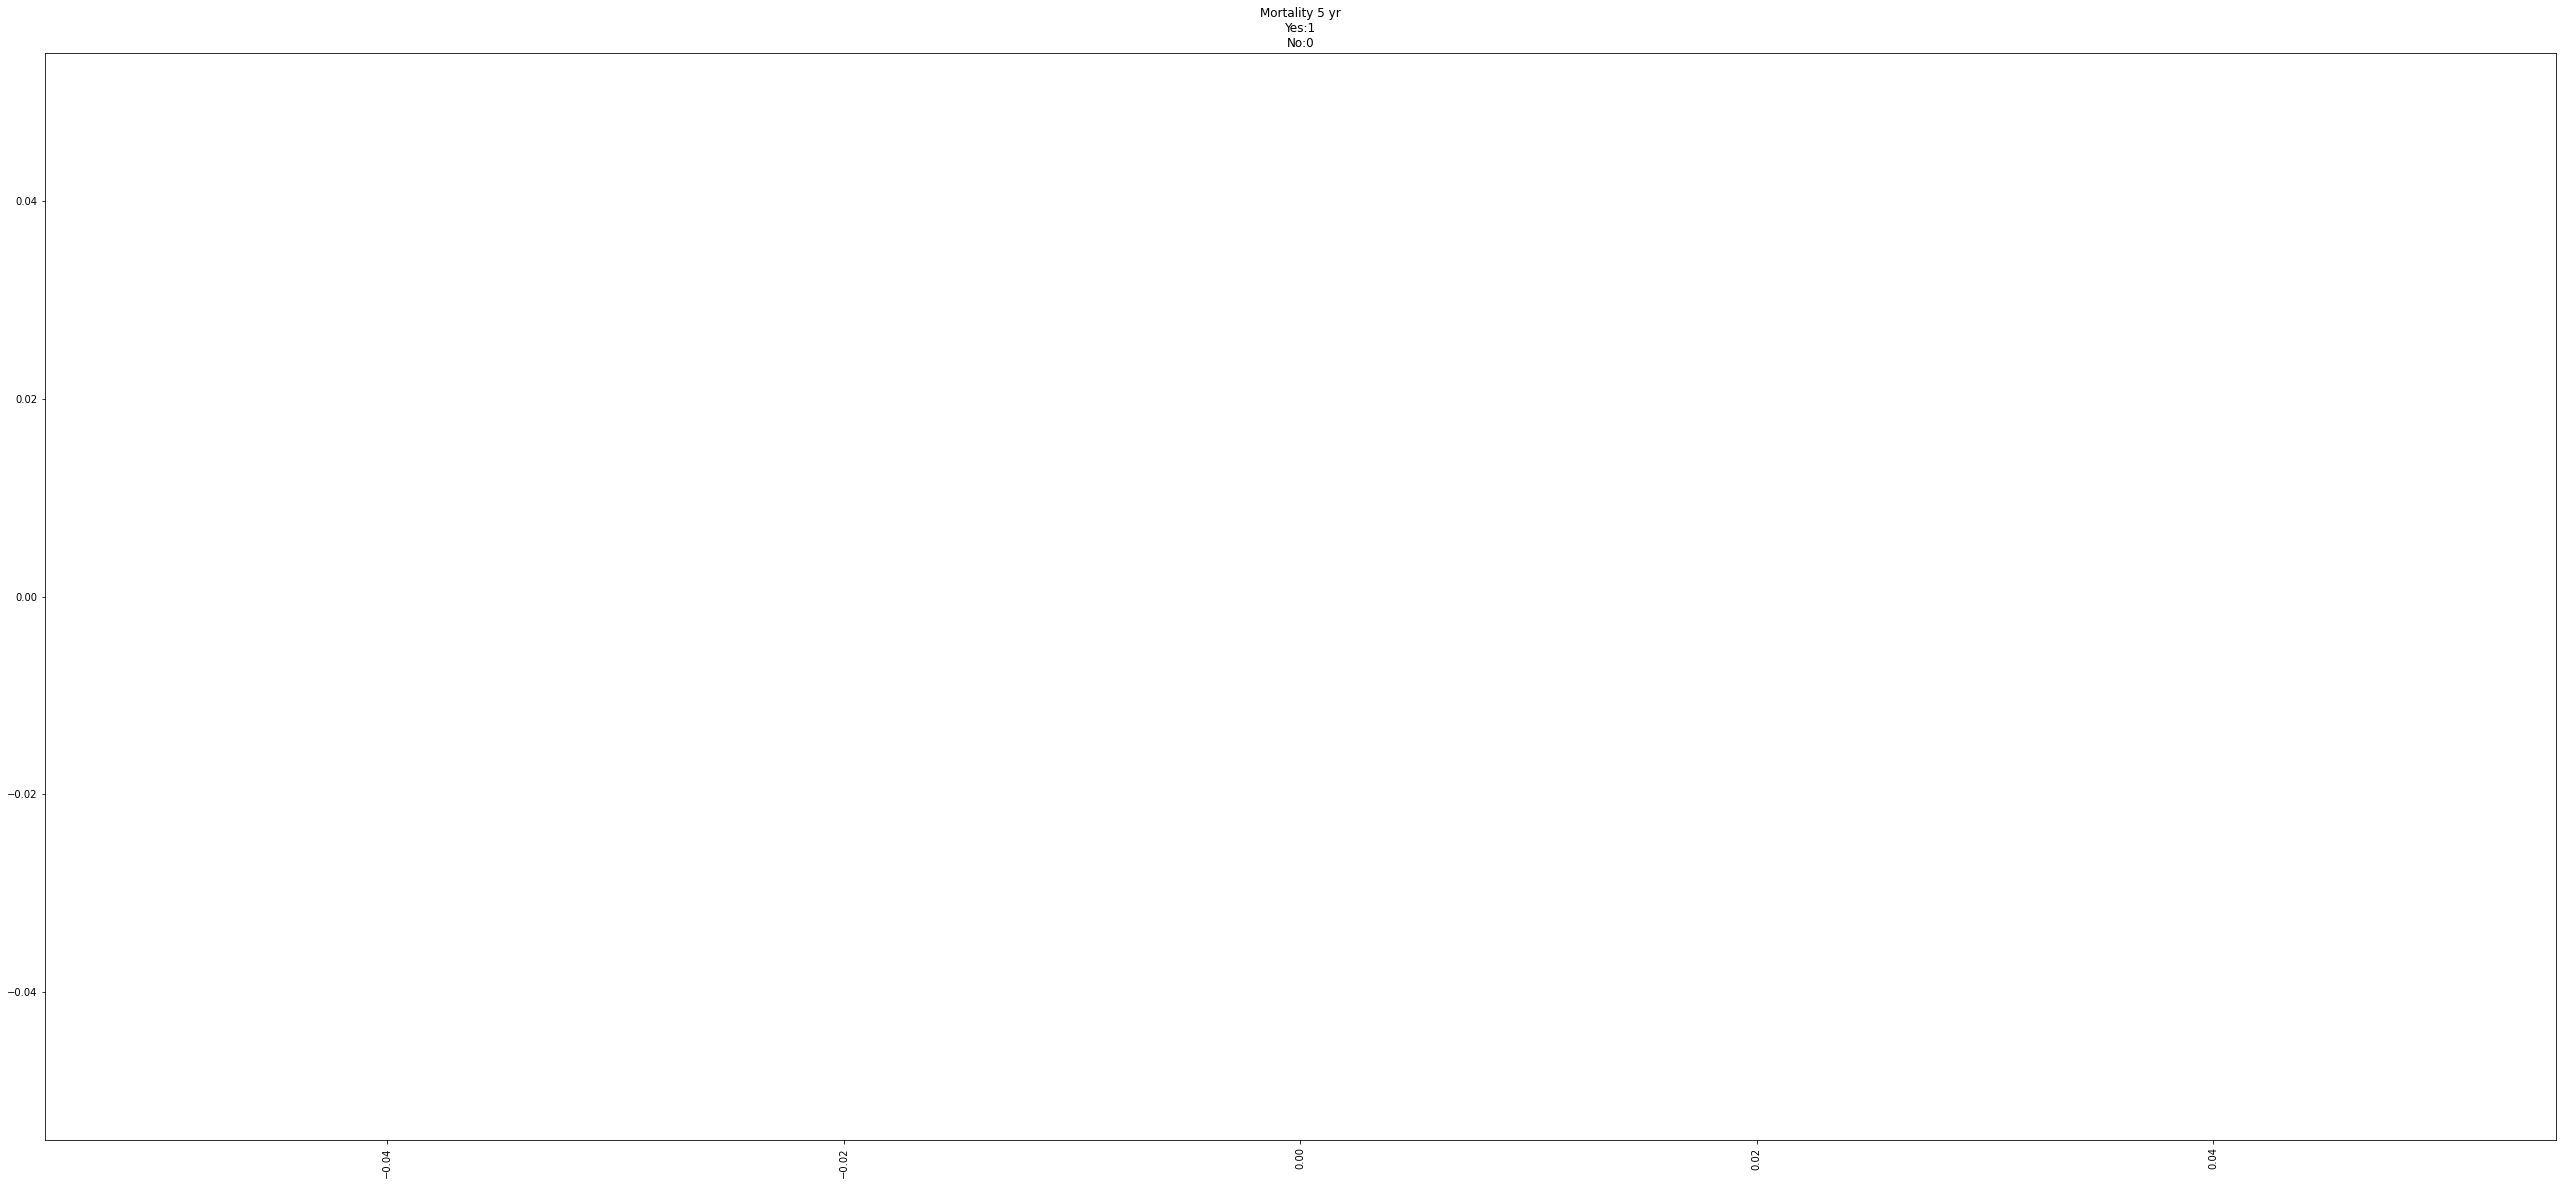

In [81]:
plt.figure(figsize=(45,20))
graph = plt.bar(prima_facie[5],result[5], width=.7)
plt.xticks(rotation='vertical')
plt.title('Mortality 5 yr\nYes:1\nNo:0')

plt.show()